# Geovisualisation

## 📖 Ahead of time...

This block is all about visualising statistical data on top of a geography. Although this task looks simple, there are a few technical and conceptual building blocks that it helps to understand before we try to make our own maps. Aim to complete the following readings by the time we get our hands on the keyboard: 

- [Block D](https://darribas.org/gds_course/content/bD/concepts_D.html) of the GDS course {cite}`darribas_gds_course`, which provides an introduction to choropleths (statistical maps)
- [Chapter 5](https://geographicdata.science/book/notebooks/05_choropleth.html) of the GDS Book {cite}`reyABwolf`, discussing choropleths in more detail


## 💻 Hands-on coding

In [1]:
import geopandas
import contextily
import seaborn as sns

````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
db = geopandas.read_file("../data/cambodia_regional.gpkg")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
db = geopandas.read_file(
    "https://darribas.org/gds4ae/_downloads/9366d230310a8a68b2ce6cf2787a2f1c/cambodia_regional.gpkg"
)
```
````

```{margin} Data
If you want to read more about the data sources behind this dataset, head to the [Datasets](../data/datasets) section
```


In [2]:
db = geopandas.read_file("../data/cambodia_regional.gpkg")

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


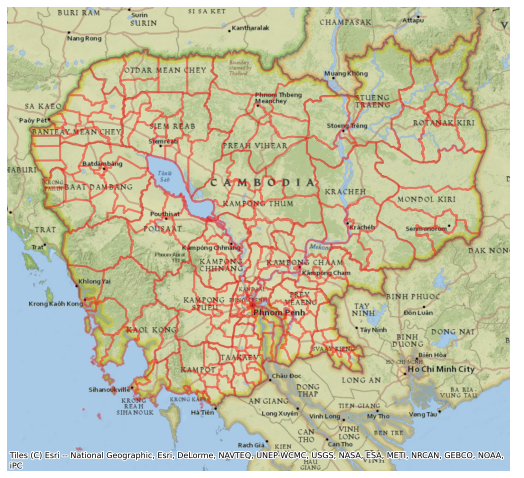

In [3]:
ax = db.to_crs(
    epsg=3857
).plot(
    edgecolor="red",
    facecolor="none",
    linewidth=2,
    alpha=0.25,
    figsize=(9, 9)
)
contextily.add_basemap(
    ax,
    source=contextily.providers.Esri.NatGeoWorldMap
)
ax.set_axis_off();

In [4]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   adm2_name   198 non-null    object  
 1   adm2_altnm  122 non-null    object  
 2   motor_mean  198 non-null    float64 
 3   walk_mean   198 non-null    float64 
 4   no2_mean    198 non-null    float64 
 5   geometry    198 non-null    geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 9.4+ KB


We will use the average measurement of [nitrogen dioxide](http://www.tropomi.eu/data-products/nitrogen-dioxide) (`no2_mean`) by region throughout the block. 

To make visualisation a bit easier below, we create an additional column with values rescaled:

In [5]:
db["no2_viz"] = db["no2_mean"] * 1e5

This way, numbers are larger and will fit more easily on legends:

In [6]:
db[["no2_mean", "no2_viz"]].describe()

,no2_mean,no2_viz
count,198.000000,198.000000
mean,0.000032,3.236567
std,0.000017,1.743538
min,0.000014,1.377641
25%,0.000024,2.427438
50%,0.000029,2.922031
75%,0.000034,3.390426
max,0.000123,12.323324


### Choropleths

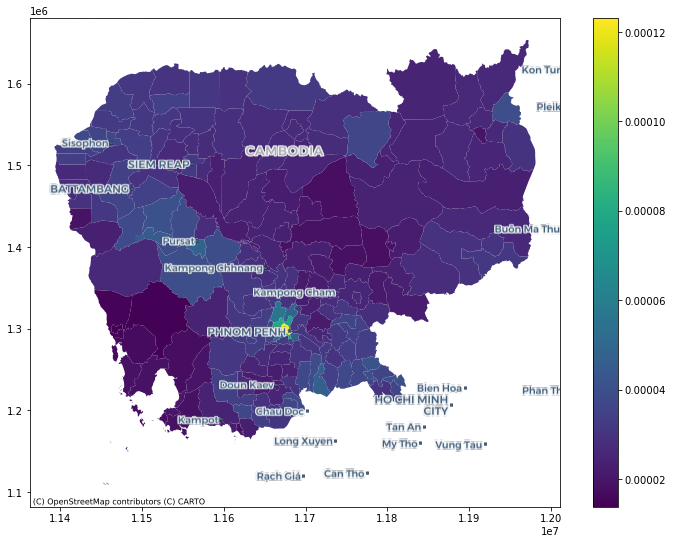

In [7]:
ax = db.to_crs(
    epsg=3857
).plot(
    "no2_mean", 
    legend=True,
    figsize=(12, 9)
)
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.VoyagerOnlyLabels,
    zoom=7
);

#### A classiffication problem

In [8]:
db["no2_viz"].unique().shape

(198,)

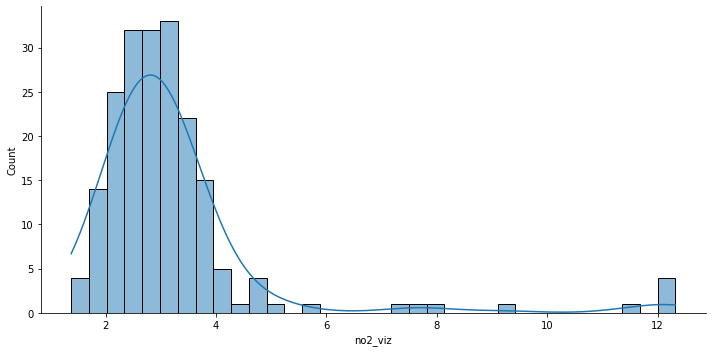

In [9]:
sns.displot(
    db, x="no2_viz", kde=True, aspect=2
);

Use `mapclassify` to cover:

- Equal interval
- Choropleths
- Fisher-Jenks

Point to further algos

#### How many colors?

#### Using the *right* color

### Choropleths on Geo-Tables

### Surface visualisation

## 🐾 Next steps